In [10]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from src.helpers.diabetes.madex import mean_adjusted_exponent_error
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas

In [40]:
def run_experiment(train_parameters, unseen_data_parameters):

    source_df = create_tsfresh_dataframe(train_parameters)
    clean_df = source_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])

    setup(clean_df,
        target='label',
        feature_selection=True,
        html=False,
        silent=True,
        session_id=1974
        )

    best3 = compare_models(
        exclude=['catboost', 'xgboost'],
        sort='RMSE',
        n_select=3,
        # verbose=False
    )
    master_output = {}
    for selected_model in best3:
        output = {}
        model = create_model(selected_model)
        model_name = model.__str__().split('(')[0]
        output['model'] = model
        output['model_name'] = model_name
        pd = predict_model(model)
        (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
        output['internal_cga_analysis'] = res
        rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
        rmadex = np.sqrt(mean_adjusted_exponent_error(
            pd['label'], pd['Label']))
        output['internal_rmse'] = rmse
        output['internal_rmadex'] = rmadex

        unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
        clean_unseen_df = unseen_df.drop(
            columns=['start', 'end', 'start_time', 'end_time'])
        unseen_pd = predict_model(model, data=clean_unseen_df)
        (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
        output['unseen_cga_analysis'] = res
        rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
        rmadex = np.sqrt(mean_adjusted_exponent_error(
            unseen_pd['label'], unseen_pd['Label']))
        output['unseen_rmse'] = rmse
        output['unseen_rmadex'] = rmadex
        logger.info(output)
        master_output[model_name] = output
        # df_array.append()
    print(master_output)
    return master_output
    # final = pandas.concat(df_array)
    # final

2021-06-17 14:45:54.708 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_0_6_1.pkl
2021-06-17 14:45:54.780 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


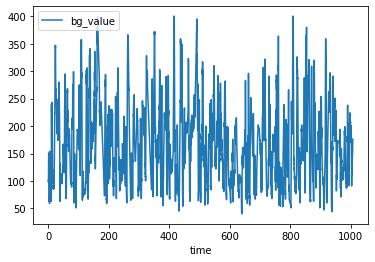

2021-06-17 14:45:55.134 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-17 14:45:55.135 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_0_6_1.pkl
Setup Succesfully Completed!


,Description,Value
0,session_id,1974
1,Target,label
2,Original Data,"(10790, 788)"
3,Missing Values,True
4,Numeric Features,260
5,Categorical Features,527
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7552, 227)"


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,29.7403,171871.1735,158.734,-32.7545,0.2367,0.2256,0.084


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,3.9572,1204.6232,17.2732,0.7632,0.0660,0.0262,0.408
lr,Linear Regression,29.7403,171871.1735,158.7340,-32.7545,0.2367,0.2256,0.084


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,3.9572,1204.6232,17.2732,0.7632,0.0660,0.0262,0.408
ridge,Ridge Regression,5.9927,633.4520,17.8084,0.8742,0.0732,0.0412,0.052
lr,Linear Regression,29.7403,171871.1735,158.7340,-32.7545,0.2367,0.2256,0.084


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,3.9527,1022.1436,16.9878,0.7988,0.0597,0.0260,0.587
lasso,Lasso Regression,3.9572,1204.6232,17.2732,0.7632,0.0660,0.0262,0.408
ridge,Ridge Regression,5.9927,633.4520,17.8084,0.8742,0.0732,0.0412,0.052
lr,Linear Regression,29.7403,171871.1735,158.7340,-32.7545,0.2367,0.2256,0.084


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
lar,Least Angle Regression,4.049936e+10,8.758351e+22,9.870052e+10,-1.586882e+19,12.0729,2.983733e+08,0.112


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
lar,Least Angle Regression,4.049936e+10,8.758351e+22,9.870052e+10,-1.586882e+19,12.0729,2.983733e+08,0.112


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
lar,Least Angle Regression,4.049936e+10,8.758351e+22,9.870052e+10,-1.586882e+19,12.0729,2.983733e+08,0.112


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
lar,Least Angle Regression,4.049936e+10,8.758351e+22,9.870052e+10,-1.586882e+19,12.0729,2.983733e+08,0.112


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
par,Passive Aggressive Regressor,1.679429e+02,2.057818e+06,1.069000e+03,-4.039675e+02,0.7375,1.200000e+00,0.116
lar,Least Angle Regression,4.049936e+10,8.758351e+22,9.870052e+10,-1.586882e+19,12.0729,2.983733e+08,0.112


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
huber,Huber Regressor,1.250203e+02,2.282862e+04,1.385468e+02,-3.634300e+00,3.3580,7.654000e-01,0.859
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
par,Passive Aggressive Regressor,1.679429e+02,2.057818e+06,1.069000e+03,-4.039675e+02,0.7375,1.200000e+00,0.116
lar,Least Angle Regression,4.049936e+10,8.758351e+22,9.870052e+10,-1.586882e+19,12.0729,2.983733e+08,0.112


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
huber,Huber Regressor,1.250203e+02,2.282862e+04,1.385468e+02,-3.634300e+00,3.3580,7.654000e-01,0.859
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084
par,Passive Aggressive Regressor,1.679429e+02,2.057818e+06,1.069000e+03,-4.039675e+02,0.7375,1.200000e+00,0.116


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
huber,Huber Regressor,1.250203e+02,2.282862e+04,1.385468e+02,-3.634300e+00,3.3580,7.654000e-01,0.859
lr,Linear Regression,2.974030e+01,1.718712e+05,1.587340e+02,-3.275450e+01,0.2367,2.256000e-01,0.084


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.077600e+00,6.356080e+01,7.871500e+00,9.872000e-01,0.0475,2.640000e-02,39.077
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045
huber,Huber Regressor,1.250203e+02,2.282862e+04,1.385468e+02,-3.634300e+00,3.3580,7.654000e-01,0.859


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.972700e+00,6.000290e+01,7.652200e+00,9.879000e-01,0.0458,2.560000e-02,17.745
rf,Random Forest Regressor,4.077600e+00,6.356080e+01,7.871500e+00,9.872000e-01,0.0475,2.640000e-02,39.077
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
llar,Lasso Least Angle Regression,5.801240e+01,4.995001e+03,7.065170e+01,-1.900000e-03,0.4438,4.332000e-01,0.045


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.972700e+00,6.000290e+01,7.652200e+00,9.879000e-01,0.0458,2.560000e-02,17.745
rf,Random Forest Regressor,4.077600e+00,6.356080e+01,7.871500e+00,9.872000e-01,0.0475,2.640000e-02,39.077
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232
ada,AdaBoost Regressor,1.595140e+01,4.033834e+02,2.000190e+01,9.191000e-01,0.1592,1.295000e-01,5.716


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.152400e+00,5.797820e+01,7.487800e+00,9.883000e-01,0.0457,2.720000e-02,13.141
et,Extra Trees Regressor,3.972700e+00,6.000290e+01,7.652200e+00,9.879000e-01,0.0458,2.560000e-02,17.745
rf,Random Forest Regressor,4.077600e+00,6.356080e+01,7.871500e+00,9.872000e-01,0.0475,2.640000e-02,39.077
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052
br,Bayesian Ridge,3.980300e+00,1.003659e+03,1.827890e+01,8.016000e-01,0.0649,2.580000e-02,0.232


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.152400e+00,5.797820e+01,7.487800e+00,9.883000e-01,0.0457,2.720000e-02,13.141
lightgbm,Light Gradient Boosting Machine,4.029400e+00,5.885620e+01,7.552500e+00,9.881000e-01,0.0455,2.600000e-02,1.871
et,Extra Trees Regressor,3.972700e+00,6.000290e+01,7.652200e+00,9.879000e-01,0.0458,2.560000e-02,17.745
rf,Random Forest Regressor,4.077600e+00,6.356080e+01,7.871500e+00,9.872000e-01,0.0475,2.640000e-02,39.077
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.152400e+00,5.797820e+01,7.487800e+00,9.883000e-01,0.0457,2.720000e-02,13.141
lightgbm,Light Gradient Boosting Machine,4.029400e+00,5.885620e+01,7.552500e+00,9.881000e-01,0.0455,2.600000e-02,1.871
et,Extra Trees Regressor,3.972700e+00,6.000290e+01,7.652200e+00,9.879000e-01,0.0458,2.560000e-02,17.745
rf,Random Forest Regressor,4.077600e+00,6.356080e+01,7.871500e+00,9.872000e-01,0.0475,2.640000e-02,39.077
omp,Orthogonal Matching Pursuit,3.718200e+00,1.626032e+02,9.791900e+00,9.667000e-01,0.0512,2.390000e-02,0.049
dt,Decision Tree Regressor,6.390200e+00,1.460506e+02,1.207090e+01,9.706000e-01,0.0708,4.100000e-02,0.646
knn,K Neighbors Regressor,7.333700e+00,1.919604e+02,1.377170e+01,9.612000e-01,0.0899,4.940000e-02,0.671
en,Elastic Net,3.952700e+00,1.022144e+03,1.698780e+01,7.988000e-01,0.0597,2.600000e-02,0.587
lasso,Lasso Regression,3.957200e+00,1.204623e+03,1.727320e+01,7.632000e-01,0.0660,2.620000e-02,0.408
ridge,Ridge Regression,5.992700e+00,6.334520e+02,1.780840e+01,8.742000e-01,0.0732,4.120000e-02,0.052


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.9188,35.7484,5.9790,0.9921,0.0390,0.0259
1,4.1044,49.7256,7.0516,0.9903,0.0448,0.0271
2,4.0183,38.8116,6.2299,0.9920,0.0396,0.0265
3,4.3101,60.8465,7.8004,0.9881,0.0400,0.0266
4,4.3124,66.5786,8.1596,0.9870,0.0460,0.0268
5,4.0353,39.5884,6.2919,0.9928,0.0451,0.0274
6,4.2308,71.2362,8.4402,0.9853,0.0556,0.0294
7,4.4348,108.2619,10.4049,0.9781,0.0615,0.0285
8,3.9250,35.1138,5.9257,0.9931,0.0393,0.0259
9,4.2341,73.8708,8.5948,0.9843,0.0466,0.0276


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,4.2287,77.5097,8.804,0.9843,0.0542,0.0278


2021-06-17 15:02:59.393 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_0_6_1.pkl
2021-06-17 15:02:59.410 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


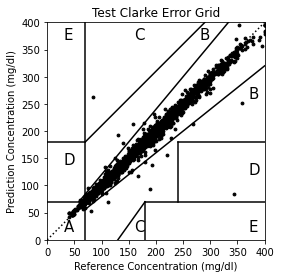

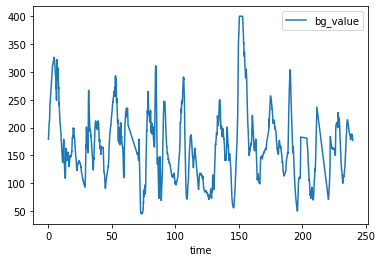

2021-06-17 15:02:59.829 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-17 15:02:59.831 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_1.pkl
2021-06-17 15:03:00.868 | INFO     | __main__:run_experiment:48 - {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_st

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7919,39.2248,6.2630,0.9914,0.0377,0.0242
1,4.0650,49.0348,7.0025,0.9905,0.0438,0.0265
2,3.8498,39.0060,6.2455,0.9920,0.0396,0.0251
3,4.0021,56.7190,7.5312,0.9889,0.0389,0.0245
4,4.1634,65.6977,8.1054,0.9872,0.0460,0.0258
5,4.0584,43.5725,6.6009,0.9921,0.0470,0.0272
6,4.1143,76.5458,8.7490,0.9842,0.0569,0.0282
7,4.2985,107.9092,10.3879,0.9782,0.0619,0.0275
8,3.8844,35.5217,5.9600,0.9930,0.0380,0.0252
9,4.0663,75.3309,8.6793,0.9839,0.0451,0.0259


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.9675,72.9983,8.5439,0.9853,0.0517,0.026


2021-06-17 15:03:22.611 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_0_6_1.pkl
2021-06-17 15:03:22.624 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


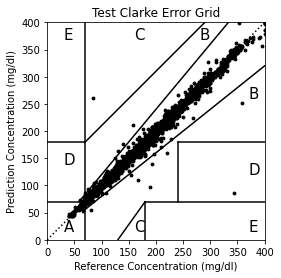

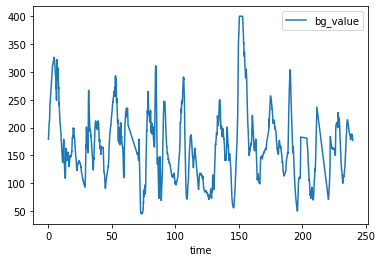

2021-06-17 15:03:22.997 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-17 15:03:22.998 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_1.pkl
2021-06-17 15:03:24.045 | INFO     | __main__:run_experiment:48 - {'model': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1974, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 'model_name': 'LGBMRegressor', 'internal_cga_analysis': [3221, 13, 1, 3, 0], 'internal_rmse': 8.543906422639669, 'internal_rmadex': 5589.62392356981, 'unseen_cga_analysis': [2498, 8, 1, 1, 0], 'unseen_

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.8050,42.0971,6.4882,0.9907,0.0379,0.0242
1,3.9553,56.5109,7.5174,0.9890,0.0444,0.0255
2,3.9330,42.0049,6.4811,0.9914,0.0396,0.0253
3,4.0137,55.9708,7.4814,0.9890,0.0377,0.0245
4,3.9603,60.3670,7.7696,0.9882,0.0449,0.0247
5,3.9383,43.9474,6.6293,0.9920,0.0494,0.0269
6,4.0396,75.0387,8.6625,0.9845,0.0563,0.0277
7,4.1640,105.4267,10.2678,0.9787,0.0611,0.0267
8,3.8868,41.4157,6.4355,0.9919,0.0400,0.0248
9,4.0307,77.2496,8.7892,0.9835,0.0465,0.0257


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.9134,77.3381,8.7942,0.9844,0.0536,0.0256


2021-06-17 15:06:40.986 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_0_6_1.pkl
2021-06-17 15:06:41.003 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


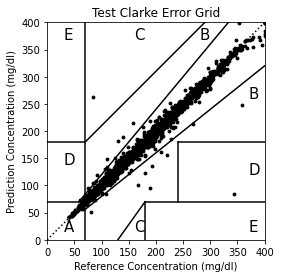

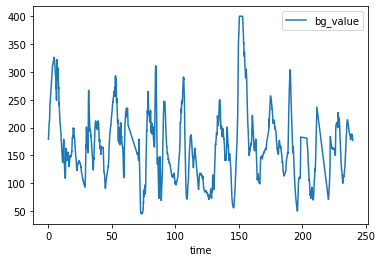

2021-06-17 15:06:41.451 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-17 15:06:41.451 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_1.pkl
2021-06-17 15:06:42.534 | INFO     | __main__:run_experiment:48 - {'model': ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1974, verbose=0, warm_start=False), 'model_name': 'ExtraTreesRegressor', 'internal_cga_analysis': [3215, 20, 1, 2, 0], 'internal_rmse': 8.794206893235192, 'internal_rmadex': 6015.18123279757, 'unseen_cga_anal

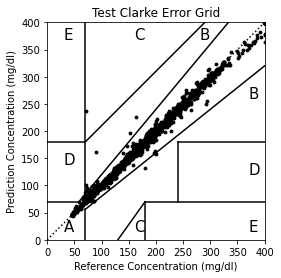

In [45]:
parameters = {
    'ohio_no': 559,
    'scope': 'train',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

test_parameters = {
    'ohio_no': 559,
    'scope': 'test',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

output = run_experiment(parameters, test_parameters)

In [46]:
output

{'GradientBoostingRegressor': {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1974, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False),
  'model_name': 'GradientBoostingRegressor',
  'internal_cga_analysis': [3218, 17, 1, 2, 0],
  'internal_rmse': 8.803959036284386,
  'internal_rmadex': 5813.317078467328,
  'unseen_cga_analysis': [2500, 6, 1, 1, 0],
  'unseen_rmse': 6.356496531188024,
  'unseen_rmadex': 76.353

In [47]:
pandas.DataFrame.from_dict(output, orient='index')

,model,model_name,internal_cga_analysis,internal_rmse,internal_rmadex,unseen_cga_analysis,unseen_rmse,unseen_rmadex
GradientBoostingRegressor,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingRegressor,"[3218, 17, 1, 2, 0]",8.803959,5813.317078,"[2500, 6, 1, 1, 0]",6.356497,76.353450
LGBMRegressor,"LGBMRegressor(boosting_type='gbdt', class_weig...",LGBMRegressor,"[3221, 13, 1, 3, 0]",8.543906,5589.623924,"[2498, 8, 1, 1, 0]",6.270790,79.964376
ExtraTreesRegressor,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",ExtraTreesRegressor,"[3215, 20, 1, 2, 0]",8.794207,6015.181233,"[2497, 9, 1, 1, 0]",6.313530,82.743732


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>